# Lab 3

In this lab exercise, you will look at applying an edge detector. We will use several functions from [scikit-image](https://scikit-image.org) to perform edge detection and visualisation. 

You are asked to write a short (no more than 2 pages) report of your work, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback. 

### Task 1

Work your way through the script below. Using online documentation, understand how each function works, from edge detection, Hough Transform and line detection. Write a summary of how this algorithm works.

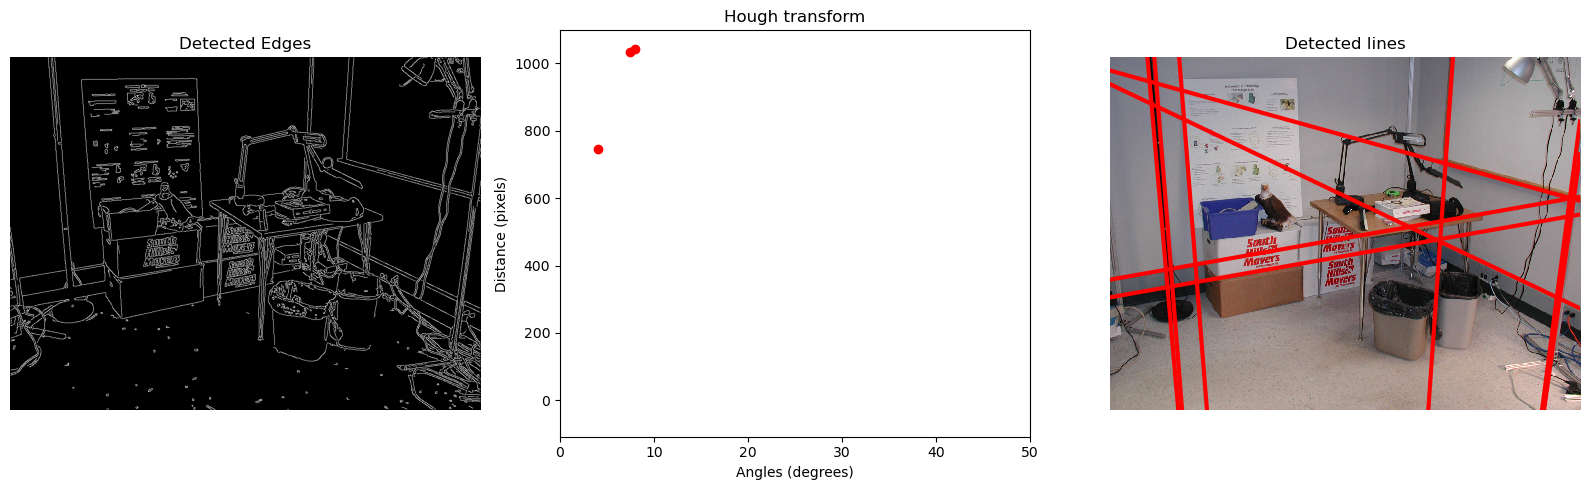

In [6]:
# Lab 3: Hough Transform

#This script is based off the following guide: https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html

# Imports

from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.color import rgb2gray
from skimage.feature import canny
from matplotlib import cm

## First we will read the image and find edges
# Read image
img = io.imread('cluttera2.jpg')

# The image is RGB and we need to convert to grayscale
img_grey = rgb2gray(img)

# Apply your favourite edge detector: Here I am using Built-in Canny
img_edges = canny(img_grey)

# Configure the figure
fig, axes = plt.subplots(1, 3,figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(img_edges, cmap=cm.gray)
ax[0].set_title('Detected Edges')
ax[0].set_axis_off()

# Classic straight-line Hough transform
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(img_edges, theta=tested_angles)

accum, angles, dists = hough_line_peaks(h,theta,d,threshold=1,num_peaks=10)

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]

# Plot each of the lines on the hough transform
for i in range(0,len(angles)):
    ax[1].plot(np.rad2deg(angles[i]),dists[i],'ro')

ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray,aspect=0.1)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')

ax[1].axis('auto')
ax[1].set_xlim(0,50)

# Plot Figure 3: Detected Lines
for i in range(0,len(angles)):
    (x0, y0) = dists[i] * np.array([np.cos(angles[i]), np.sin(angles[i])])
    ax[2].axline((x0, y0),slope=np.tan(angles[i] + np.pi/2), color="red", linewidth=3)

ax[2].set_ylim((img.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

io.imshow(img)
plt.show()


### Task 2

What is the effect of increasing/decreasing the required number of peaks in ‘houghpeaks’?

### Task 3 

Replace the Canny Edge detector with other algorithms. Which one do you think performs best and why?

### Task 3 

Examine the guide for Probabilistic Hough Transform: https://scikit-image.org/docs/stable/auto_examples/edges/plot_line_hough_transform.html#probabilistic-hough-transform. Apply probabilistic hough transform to the provided image. Describe in the report how this algorithm works, particularly when finding the start/finish of a line.